<a href="https://colab.research.google.com/github/saziaa/Decoding_Energy_Consumption/blob/main/capstone_v0_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Dependencies**

In [1]:
import pandas as pd
import numpy as np

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 1.0)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

**Load the Dataset**

In [2]:
# Loading the dataset from the xlsx file into a pandas dataframe
df= pd.read_csv('/content/Melbourne_Wastewater_Treatment.csv')

**Renaming the columns for readability**

In [3]:
# Rename the columns
column_names = {
    'avg_outflow': 'Avg_outflow',
    'avg_inflow': 'Avg_inflow',
    'total_grid': 'Energy_consumption',
    'Am': 'Ammonia',
    'BOD': 'BOD',
    'COD': 'COD',
    'TN': 'Total_nitrogen',
    'T': 'Avg_temp',
    'TM': 'Max_temp',
    'Tm': 'Min_temp',
    'SLP': 'Atm_pressure',
    'H': 'Avg_humidity',
    'PP': 'Total_precipitation',
    'VV': 'Avg_visibility',
    'V': 'Avg_wind_speed',
    'VM': 'Max_wind_speed',
    'VG': 'Max_gust_speed',
    'year': 'Year',
    'month': 'Month',
    'day': 'Day'
}

data = df.rename(columns=column_names)
data.head()

,Avg_outflow,Avg_inflow,Energy_consumption,Ammonia,BOD,COD,Total_nitrogen,Avg_temp,Max_temp,Min_temp,Atm_pressure,Avg_humidity,Total_precipitation,Avg_visibility,Avg_wind_speed,Max_wind_speed,Max_gust_speed,Year,Month,Day
0,2.941,2.589,175856,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56,1.52,10.0,26.9,53.5,79.5,2014,1,1
1,2.936,2.961,181624,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63,0.00,10.0,14.4,27.8,0.0,2014,1,2
2,2.928,3.225,202016,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47,0.25,10.0,31.9,61.1,77.8,2014,1,5
3,2.928,3.354,207547,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49,0.00,10.0,27.0,38.9,53.5,2014,1,6
4,2.917,3.794,202824,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65,0.00,10.0,20.6,35.2,53.5,2014,1,7


**Summary of the Dataset**

In [17]:
from matplotlib import pyplot
# summarize the shape of the dataset
print(data.shape)
# summarize each variable
print(data.describe())


(1382, 20)
       Avg_outflow   Avg_inflow  Energy_consumption      Ammonia          BOD  \
count  1382.000000  1382.000000         1382.000000  1382.000000  1382.000000   
mean      3.930608     4.506338       275159.089001    39.222302   382.061708   
std       1.228778     1.439583        44640.533689     7.761598    85.996012   
min       0.000004     2.589000       116638.000000    13.000000   140.000000   
25%       3.074500     3.643250       246435.750000    34.000000   330.000000   
50%       3.701000     4.161500       275808.000000    39.000000   360.000000   
75%       4.498750     4.847750       305703.750000    44.000000   422.980000   
max       7.920000    18.968000       398328.000000    93.000000   850.000000   

               COD  Total_nitrogen     Avg_temp     Max_temp     Min_temp  \
count  1382.000000     1382.000000  1382.000000  1382.000000  1382.000000   
mean    845.960434       62.740752    15.036686    20.530897    10.037337   
std     145.416540        3.

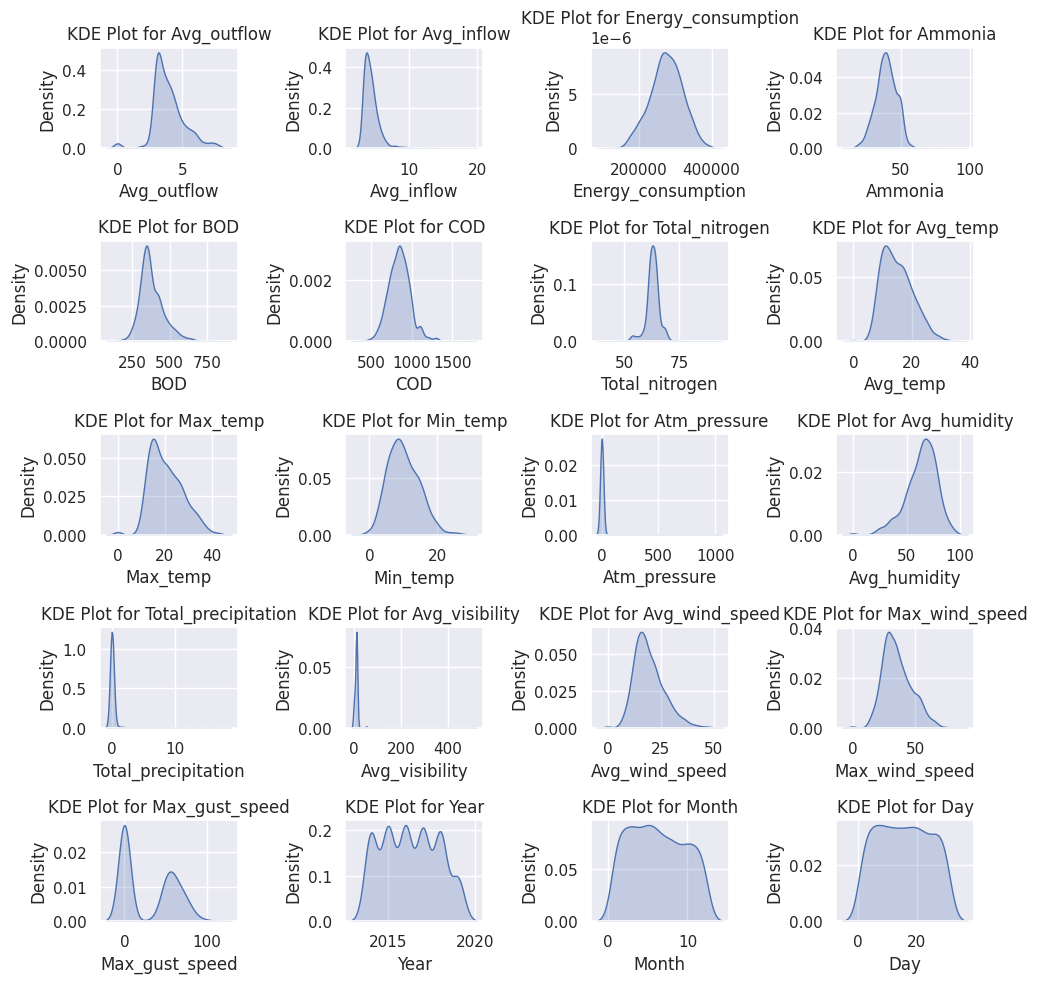

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_for_kde = ['Avg_outflow', 'Avg_inflow', 'Energy_consumption', 'Ammonia', 'BOD', 'COD',
                   'Total_nitrogen', 'Avg_temp', 'Max_temp', 'Min_temp', 'Atm_pressure',
                   'Avg_humidity', 'Total_precipitation', 'Avg_visibility', 'Avg_wind_speed',
                   'Max_wind_speed', 'Max_gust_speed', 'Year', 'Month', 'Day']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(10, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot KDD for each column
for i, col in enumerate(columns_for_kde):
    sns.kdeplot(data=data[col], ax=axes[i], fill=True)
    axes[i].set_title(f'KDE Plot for {col}')

# Adjust layout
plt.tight_layout()
plt.show()

**Data Preprocessing**

**Checking Zero Values**

In [ ]:
zero_values = data.isin([0]).sum()
print("Columns with zero values:")
print(zero_values[zero_values > 0])

Columns with zero values:
Avg_temp                  5
Max_temp                 10
Min_temp                  8
Atm_pressure           1377
Avg_humidity              5
Total_precipitation    1273
Avg_visibility          277
Avg_wind_speed            5
Max_wind_speed            5
Max_gust_speed          716
dtype: int64


The Zero values of the following columns need to be imputed:

Avg_temp, Max_temp, Atm_pressure,
Avg_humidity, Avg_wind_speed, Max_wind_speed,
Max_gust_speed

But for Total_precipitation, Min_temp, and Avg_visibility  the zero values are logical.       


**Imputing Zero Values by KNN Imputing**

In [5]:
from sklearn.impute import KNNImputer

# Columns for KNN imputation

columns_to_impute_knn = ['Avg_temp', 'Max_temp', 'Atm_pressure',
                         'Avg_humidity', 'Avg_wind_speed', 'Max_wind_speed',
                         'Max_gust_speed']
# Replace zero values with NaN to indicate missing values
data_for_imputation = data.copy()
data_for_imputation[columns_to_impute_knn] = data_for_imputation[columns_to_impute_knn].replace(0, np.nan)

# Initialize KNN imputer
imputer = KNNImputer()

# Impute missing values with KNN for specified columns
data_imputed = data_for_imputation.copy()  # Create a copy of the original dataset
data_imputed[columns_to_impute_knn] = imputer.fit_transform(data_for_imputation[columns_to_impute_knn])


In [6]:
zero_values = data_imputed.isin([0]).sum()
print("Columns with zero values:")
print(zero_values[zero_values > 0])

Columns with zero values:
Min_temp                  8
Total_precipitation    1273
Avg_visibility          277
dtype: int64


**Checking Skewness after Imputation**

In [7]:
data_imputed.skew()

Avg_outflow             0.380545
Avg_inflow              3.751865
Energy_consumption     -0.148416
Ammonia                 0.310626
BOD                     1.234594
COD                     0.743344
Total_nitrogen         -0.256672
Avg_temp                0.627529
Max_temp                0.653903
Min_temp                0.498749
Atm_pressure            4.553003
Avg_humidity           -0.613772
Total_precipitation     8.763062
Avg_visibility         22.195410
Avg_wind_speed          0.914895
Max_wind_speed          0.655457
Max_gust_speed          1.231220
Year                    0.097829
Month                   0.127443
Day                     0.039880
dtype: float64

**Checking KDE**

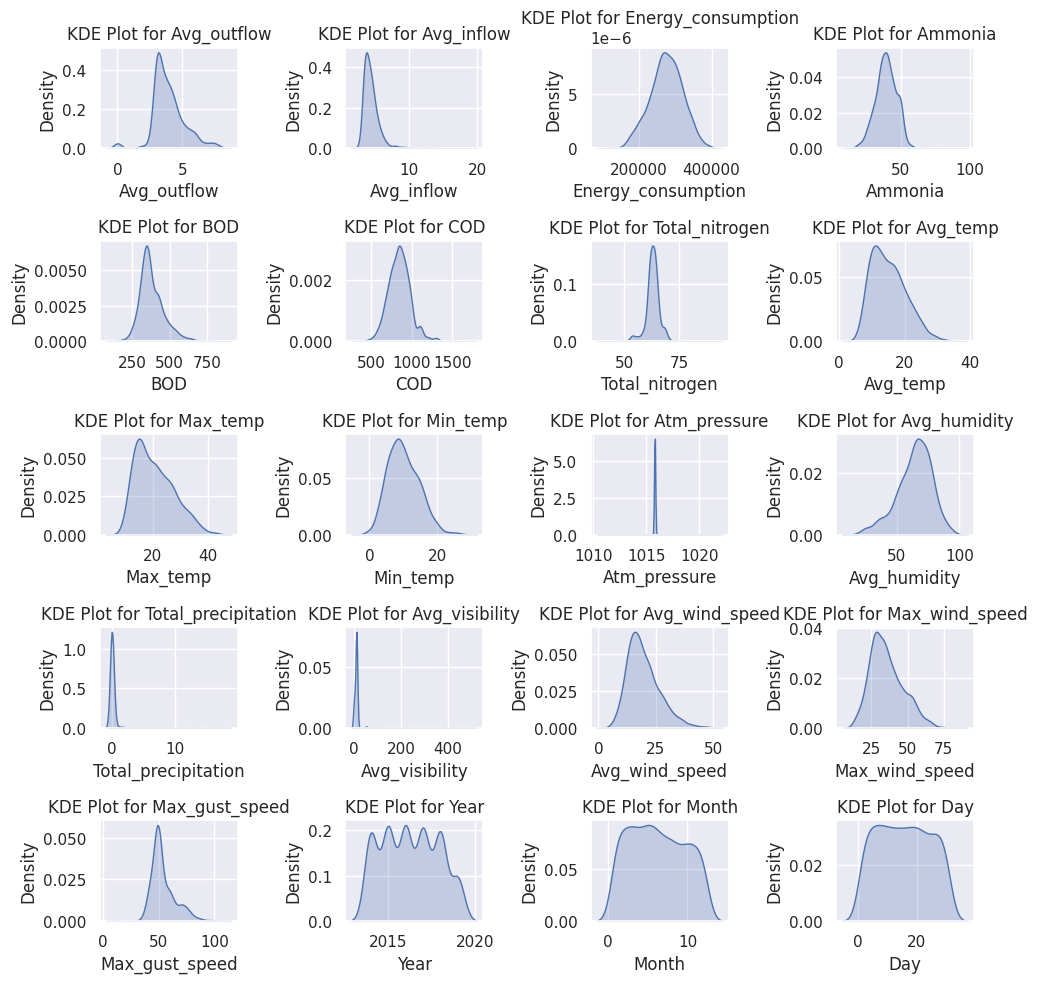

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_for_kde = ['Avg_outflow', 'Avg_inflow', 'Energy_consumption', 'Ammonia', 'BOD', 'COD',
                   'Total_nitrogen', 'Avg_temp', 'Max_temp', 'Min_temp', 'Atm_pressure',
                   'Avg_humidity', 'Total_precipitation', 'Avg_visibility', 'Avg_wind_speed',
                   'Max_wind_speed', 'Max_gust_speed', 'Year', 'Month', 'Day']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(10, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot KDD for each column
for i, col in enumerate(columns_for_kde):
    sns.kdeplot(data=data_imputed[col], ax=axes[i], fill=True)
    axes[i].set_title(f'KDE Plot for {col}')

# Adjust layout
plt.tight_layout()
plt.show()

**Checking Outliers**

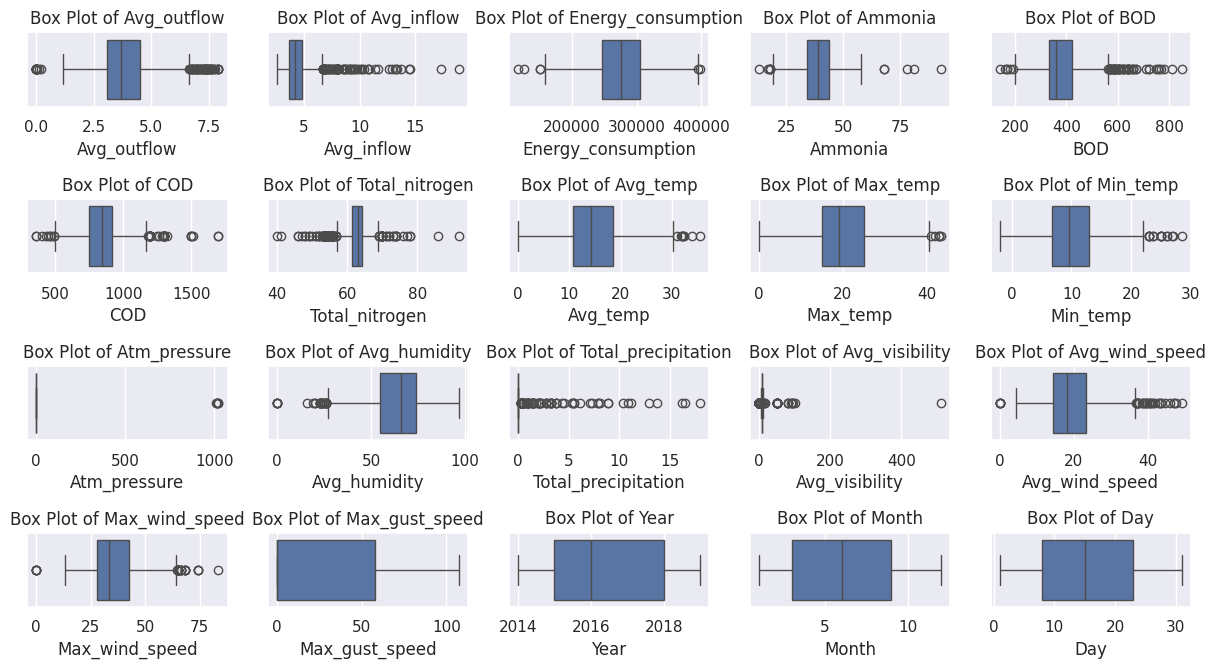

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 8))

# Iterate over each numerical column and create a box plot
for i, col in enumerate(data.select_dtypes(include='number').columns):
    plt.subplot(5,5, i+1)  # Adjust the number of rows and columns as needed
    sns.boxplot(x=data[col])
    plt.xlabel(col)
    plt.title(f'Box Plot of {col}')

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

There are some outliers so we took the decision of applying Robust Scaler which is less sensetive to outliers.

**Splitting the Dataset into Train & Test Set**

In [9]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = data_imputed.drop(columns=['Energy_consumption'])
y = data_imputed['Energy_consumption']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1105, 19)
X_test shape: (277, 19)
y_train shape: (1105,)
y_test shape: (277,)


In [11]:
# Convert train & test array back to DataFrame
X_train_df = pd.DataFrame(X_train, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

**Applying Robust Scaling**

In [12]:
from sklearn.preprocessing import RobustScaler

# Initialize RobustScaler
scaler = RobustScaler()

# Fit the scaler on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Convert scaled array back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

**Visualizatioin before & after RobustScaling**

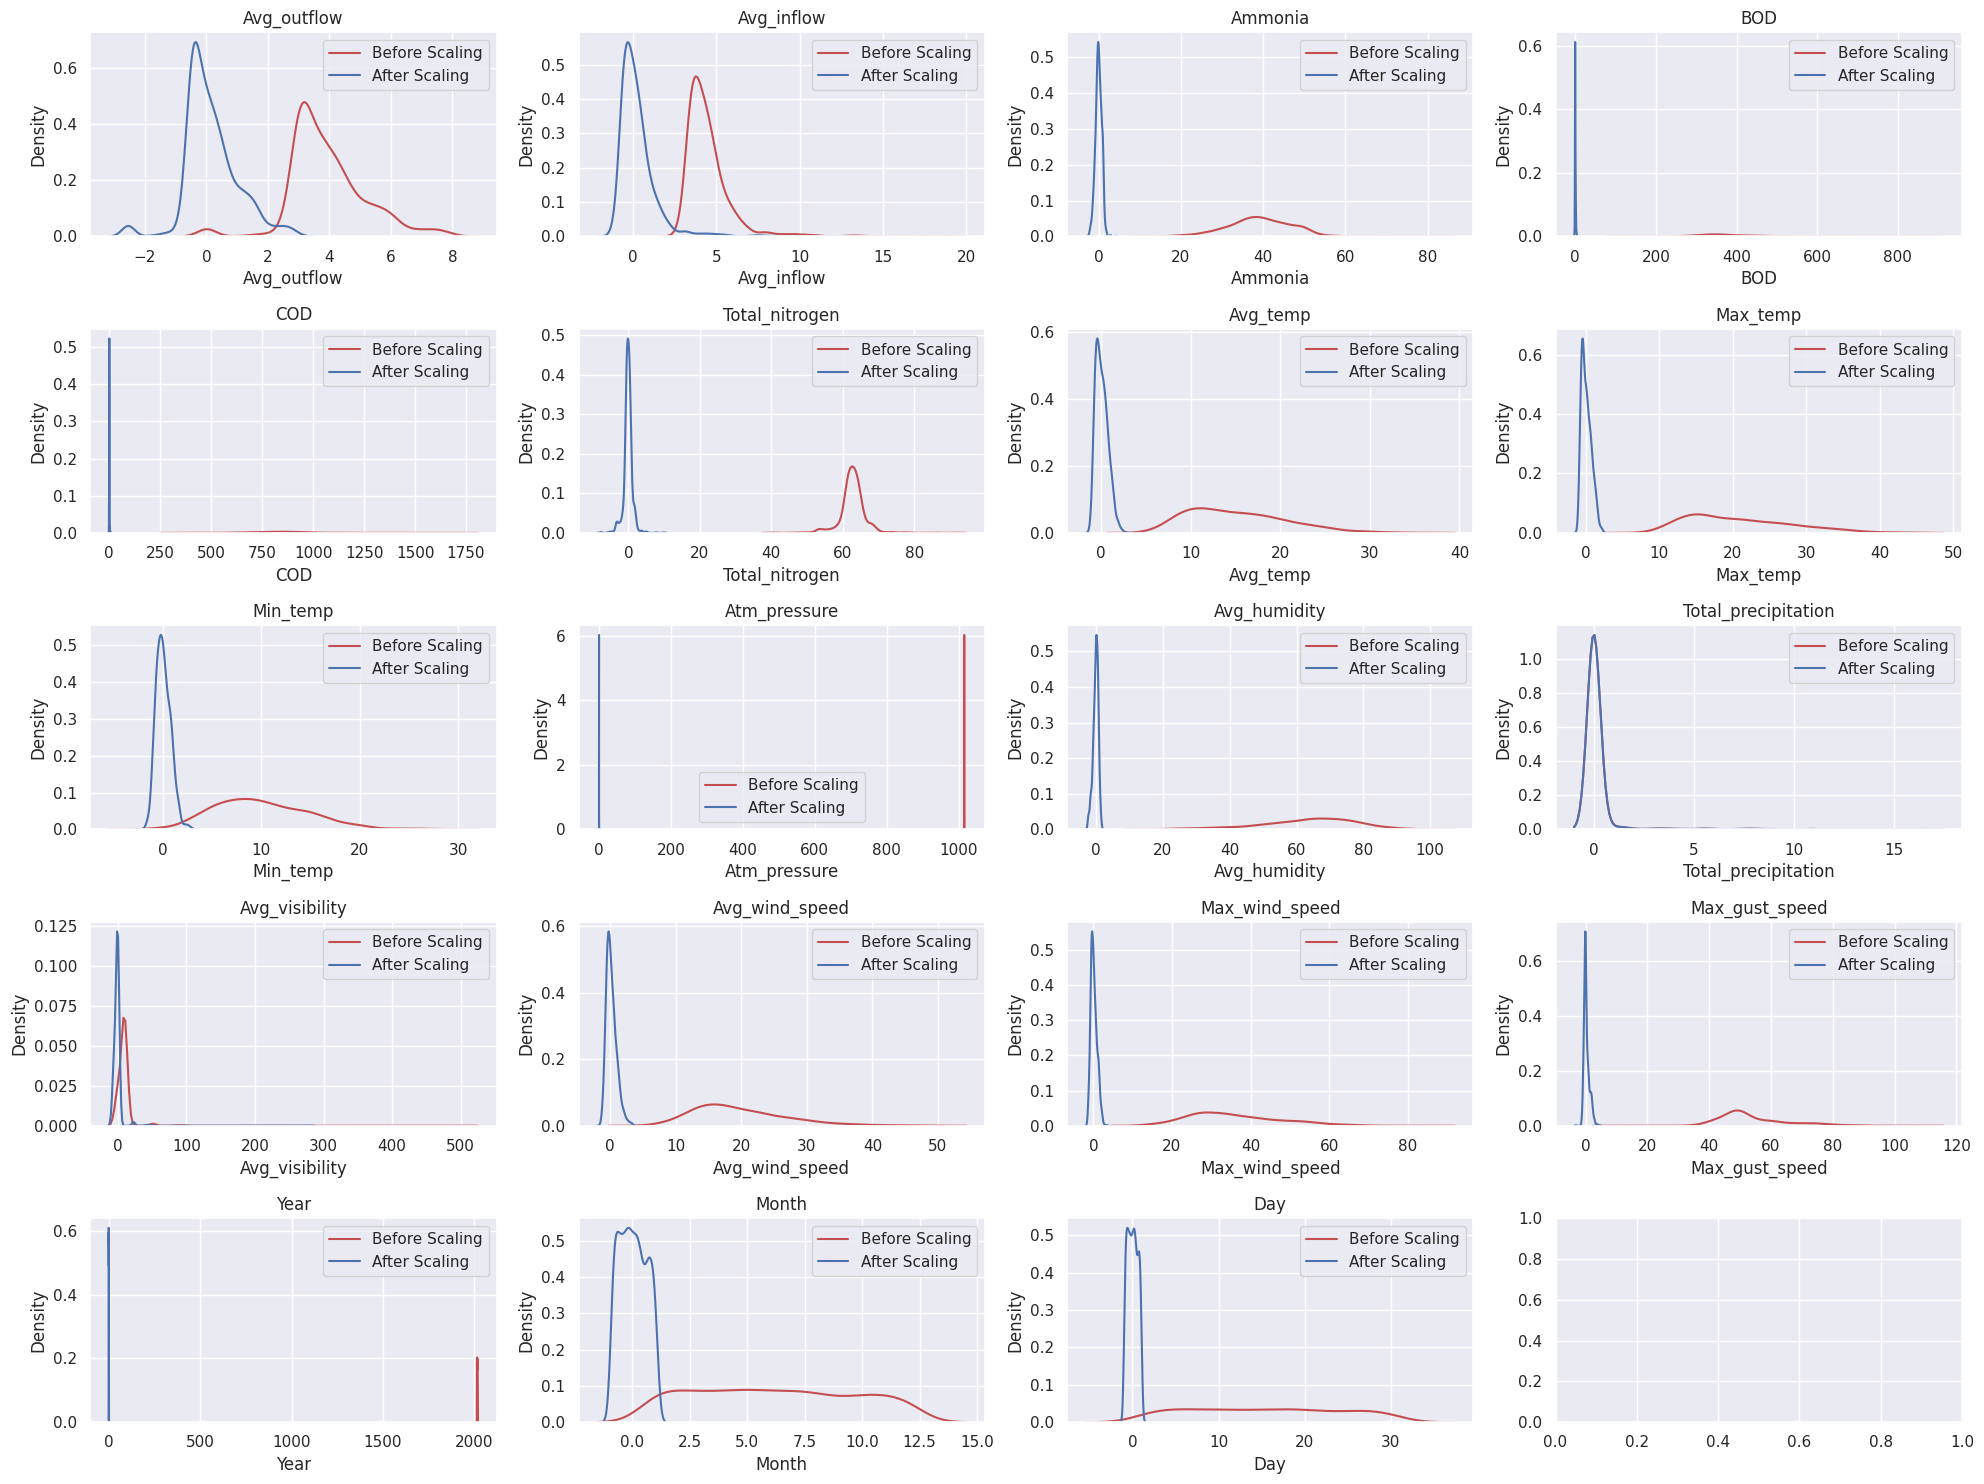

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of rows and columns for subplots
num_rows = 5
num_cols = 4

# Create subplots with the specified number of rows and columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot KDE for each column
for i, column in enumerate(X_train_df.columns):
    # Plot before scaling
    sns.kdeplot(X_train_df[column], ax=axes[i], color='r', label='Before Scaling')
    # Plot after scaling
    sns.kdeplot(X_train_scaled_df[column], ax=axes[i], color='b', label='After Scaling')
    # Set title for each subplot
    axes[i].set_title(column)
    # Add legend
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()

**Feature Selection**

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, SelectKBest, f_regression, mutual_info_regression

# Define a scorer (R2 score) for cross-validation
scorer = make_scorer(r2_score)

# Define a linear regression model
lr = LinearRegression()

# Define the pipelines for feature selection
pipelines = {
    'backward_elimination': Pipeline([
        ('feature_selection', RFE(lr)),
        ('model', lr)
    ]),
    'pearson_corr': Pipeline([
        ('feature_selection', SelectKBest(score_func=f_regression)),
        ('model', lr)
    ])
}

# Define the parameter grids for grid search
param_grids = {
    'backward_elimination': {'feature_selection__n_features_to_select': [3, 5, 7,10]},
    'pearson_corr': {'feature_selection__k': [3, 5, 7, 10]}
}

# Perform grid search for each pipeline
for method, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[method], cv=5, scoring=scorer)
    grid_search.fit(X_train_scaled, y_train)

    print(f"Best parameters for {method}: {grid_search.best_params_}")
    print(f"Best mean cross-validation score for {method}: {grid_search.best_score_}")
    print("\n")

Best parameters for backward_elimination: {'feature_selection__n_features_to_select': 7}
Best mean cross-validation score for backward_elimination: 0.18171200647988778


Best parameters for pearson_corr: {'feature_selection__k': 10}
Best mean cross-validation score for pearson_corr: 0.18183787546461835




**Applying Pearson Correlation, Mutual information, Regression Forest & RFE**

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE, SelectKBest, f_regression, mutual_info_regression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel


# Define a scorer (R2 score) for cross-validation
scorer = make_scorer(r2_score)

# Define a linear regression model
lr = LinearRegression()

# Define a random forest regressor
rf = RandomForestRegressor()

# Initialize SelectFromModel with the Random Forest model
selector = SelectFromModel(rf)

# Create a scoring function for SelectKBest using mutual_info_regression with random_state
scoring_function = lambda X, y: mutual_info_regression(X_train_scaled, y_train, random_state=42)

# Define pipelines for each feature selection method
pipelines = {
    'pearson_corr': Pipeline([
        ('feature_selection', SelectKBest(score_func=f_regression, k=10)),
        ('model', lr)
    ]),
    'mutual_info': Pipeline([
    ('feature_selection', SelectKBest(score_func=scoring_function)),
    ('model', LinearRegression())
    ]),
    'random_forest': Pipeline([
    ('feature_selection', selector),
    ('model', RandomForestRegressor(random_state=42))
    ]),
    'backward_elimination': Pipeline([
    ('feature_selection', RFE(lr, n_features_to_select=7)),
    ('model', lr),
])
}

# Perform cross-validation for each pipeline
cv_results = {}
for method, pipeline in pipelines.items():
    cv_scores = cross_val_score(pipeline, X_train_scaled, y_train, cv=10, scoring=scorer)
    cv_results[method] = cv_scores.mean()
    print(f"Mean CV score for {method}: {cv_results[method]}")

# Select the best feature selection method
best_method = max(cv_results, key=cv_results.get)
print(f"Best feature selection method: {best_method}")

Mean CV score for pearson_corr: 0.1769723880749357
Mean CV score for mutual_info: 0.1739050733791359
Mean CV score for random_forest: 0.3521101877002122
Mean CV score for backward_elimination: 0.17044193147438563
Best feature selection method: random_forest


**Calculating Feature Importance**

In [ ]:
# Get the best pipeline
best_pipeline = pipelines[best_method]

# Fit the best pipeline on the entire training data
best_pipeline.fit(X_train_scaled, y_train)

# Retrieve the trained Random Forest model
rf_model = best_pipeline.named_steps['model']

# Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Map feature importances to corresponding feature names
feature_importance_dict = dict(zip(X_train.columns, feature_importances))

# Print feature importances
print("Feature importances:")
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")

Feature importances:
Avg_outflow: 0.16131115472977073
Avg_inflow: 0.1558799452367067
Ammonia: 0.1366746011959785
BOD: 0.22102505008132245
COD: 0.10906323251275842
Total_nitrogen: 0.2160460162434632


**Visualization of Feature Selection**

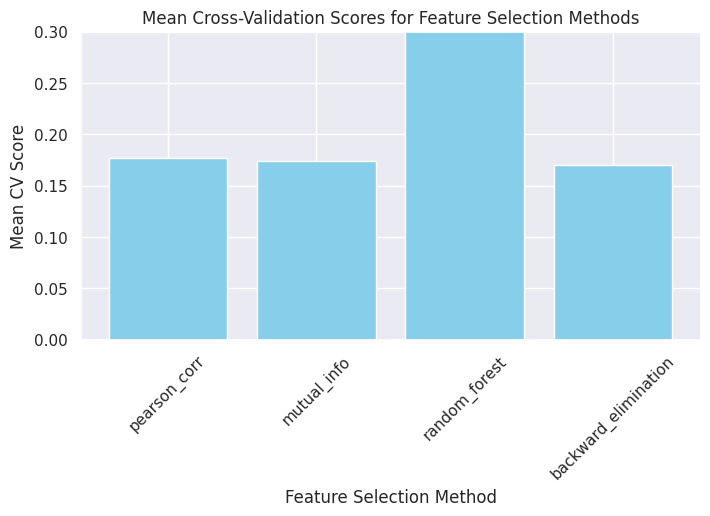

In [ ]:
import matplotlib.pyplot as plt

# Mean CV scores for each feature selection method
mean_cv_scores = {
    'pearson_corr': 0.1769723880749357,
    'mutual_info': 0.1739050733791359,
    'random_forest': 0.3489982729624483,
    'backward_elimination': 0.17044193147438563
}
# Create a bar plot for mean CV scores
plt.figure(figsize=(8, 4))
plt.bar(mean_cv_scores.keys(), mean_cv_scores.values(), color='skyblue')
plt.title('Mean Cross-Validation Scores for Feature Selection Methods')
plt.xlabel('Feature Selection Method')
plt.ylabel('Mean CV Score')
plt.ylim(0, 0.3)
plt.xticks(rotation=45)
plt.show()

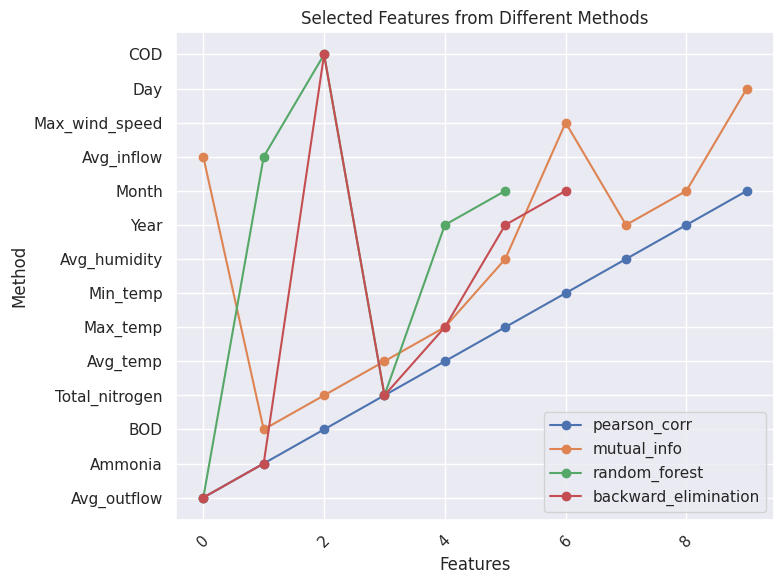

In [ ]:
import matplotlib.pyplot as plt

# Get the selected features from each pipeline
selected_features_dict = {}

for method, pipeline in pipelines.items():
    if 'feature_selection' in pipeline.named_steps:
        # Fit the pipeline to the training data
        pipeline.fit(X_train_scaled, y_train)
        # Get the selected features and store them in the dictionary
        selected_features_dict[method] = X_train_scaled_df.columns[pipeline.named_steps['feature_selection'].get_support()]
    else:
        # For methods without explicit feature selection, use all features
        selected_features_dict[method] = X_train_scaled_df.columns

# Plot the selected features for each method
plt.figure(figsize=(8, 6))
for method, selected_features in selected_features_dict.items():
    plt.plot(selected_features, label=method, marker='o')

plt.title('Selected Features from Different Methods')
plt.xlabel('Features')
plt.ylabel('Method')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


There are four group of features:time variables, wastewater variables, climate variables, and hydraulic variables.

From the first group (time variables) month is chosen as an important feature.

In the second group (wastewater variables), TN and BOD has moderately high correlation. Also there is another high correlation between COD. Thus, it is reasonable to ignore COD.

In the third group (climate parameters), Avg_temp, Max_temp and Min_temp has very high correlation. So only Avg_temp is chosen among them.

From the fourth group(hydraulic variables), Avg_outflow is chosen by three FS methods except backward elimination.

So we will consider Month, Avg_outflow, Avg_temp, BOD and Total_nitrogen as the features to perform modeling.

**Modeling Approaches**

**Applying Multiple Linear Regression**

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score
from sklearn.model_selection import cross_val_score

# Selected columns
selected_columns = ['Avg_inflow','BOD','Total_nitrogen','Month','Avg_temp' ]
# Subset features
X_train_subset = X_train_scaled_df[selected_columns]

# Initialize the Linear Regression model
model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_subset, y_train, cv=10, scoring='neg_mean_squared_error')

# Compute evaluation metrics from cross-validation scores
rmse_cv = np.sqrt(-cv_scores.mean())
mae_cv = -cv_scores.mean()
r2_cv = cross_val_score(model, X_train_subset, y_train, cv=10, scoring='r2').mean()

# Print evaluation metrics from cross-validation
print("\nEvaluation Metrics on Training Data:")
print("RMSE on Training Data (Cross-Validation):", rmse_cv)
print("MAE on Training Data (Cross-Validation):", mae_cv)
print("R2 Score on Training Data (Cross-Validation):", r2_cv)


Evaluation Metrics on Training Data:
RMSE on Training Data (Cross-Validation): 41204.96059176045
MAE on Training Data (Cross-Validation): 1697848777.3685317
R2 Score on Training Data (Cross-Validation): 0.15318436401291588


In [35]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_subset, y_train)

# Predict on the test set
X_test_subset = X_test_scaled_df[selected_columns]
y_pred = model.predict(X_test_subset)

# Calculate evaluation metrics for the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Print evaluation metrics for the test set
print("\nEvaluation Metrics on Test Data:")
print("RMSE on Test Data:", rmse_test)
print("MAE on Test Data:", mae_test)
print("R2 Score on Test Data:", r2_test)


Evaluation Metrics on Test Data:
RMSE on Test Data: 41998.740415088345
MAE on Test Data: 32270.52890576437
R2 Score on Test Data: 0.07396541661929623


**Applying Random Forest**

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],     # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],     # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],       # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],    # Number of features to consider when looking for the best split
}


# Initialize Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with the defined parameter grid and evaluation metric
grid_search = GridSearchCV(rf_regressor, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# Selected columns
selected_columns = ['Avg_inflow','BOD','Total_nitrogen','Month','Avg_temp' ]

# Subset features
X_train_subset = X_train_scaled_df[selected_columns]

# Perform grid search
grid_search.fit(X_train_subset, y_train)

# Get the best parameters and best estimator from grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Perform cross-validation predictions
cv_predictions = cross_val_predict(rf_regressor, X_train_subset, y_train, cv=10)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_train, cv_predictions))
mae = mean_absolute_error(y_train, cv_predictions)
r2 = r2_score(y_train, cv_predictions)

# Print evaluation metrics
print("\nEvaluation Metrics on Training Data:")
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Evaluation Metrics on Training Data:
RMSE: 36784.97628265813
MAE: 27869.470995475116
R2 Score: 0.32780418049841253


In [37]:
# Initialize the Random Forest regressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train_subset, y_train)

# Predict on the test set
X_test_subset = X_test_scaled_df[selected_columns]
y_pred = rf_model.predict(X_test_subset)

# Calculate evaluation metrics for the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Print evaluation metrics for the test set
print("\nEvaluation Metrics on Test Data:")
print("RMSE on Test Data:", rmse_test)
print("MAE on Test Data:", mae_test)
print("R2 Score on Test Data:", r2_test)


Evaluation Metrics on Test Data:
RMSE on Test Data: 36134.164219600076
MAE on Test Data: 27548.751732851986
R2 Score on Test Data: 0.3145264483163652


**Applying Gradient Boosting Method**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],   # Number of boosting stages
    'learning_rate': [0.05, 0.1, 0.2], # Learning rate
    'max_depth': [3, 5, 7],           # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required to be at a leaf node
}

# Initialize Gradient Boosting regressor
gbm_regressor = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV with the defined parameter grid and evaluation metric
grid_search = GridSearchCV(gbm_regressor, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# Selected columns
selected_columns = ['Avg_inflow', 'BOD', 'Total_nitrogen', 'Avg_temp', 'Month']

# Subset features
X_train_subset = X_train_scaled_df[selected_columns]

# Perform grid search
grid_search.fit(X_train_subset, y_train)

# Get the best parameters and best estimator from grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Perform cross-validation predictions with the best estimator
cv_predictions = cross_val_predict(best_estimator, X_train_subset, y_train, cv=10)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_train, cv_predictions))
mae = mean_absolute_error(y_train, cv_predictions)
r2 = r2_score(y_train, cv_predictions)

# Print evaluation metrics
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)

In [ ]:
# Initialize Gradient Boosting regressor
gbm_regressor = GradientBoostingRegressor(random_state=42)

# Fit the model to the training data
gbm_regressor.fit(X_train_subset, y_train)

# Predict on the test set
X_test_subset = X_test_scaled_df[selected_columns]
y_pred = gbm_regressor.predict(X_test_subset)

# Calculate evaluation metrics for the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Print evaluation metrics for the test set
print("\nEvaluation Metrics on Test Data:")
print("RMSE on Test Data:", rmse_test)
print("MAE on Test Data:", mae_test)
print("R2 Score on Test Data:", r2_test)

**Applying ANN**

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [50]:
import keras

from keras import models
from keras import layers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense


In [51]:
!pip install scikeras

In [53]:
from scikeras.wrappers import KerasRegressor


In [58]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from scikeras.wrappers import KerasRegressor


# Selected columns
#selected_columns = ['Avg_inflow', 'BOD', 'Total_nitrogen', 'Avg_temp', 'Month']

# Subset features
#X_train_subset = X_train_scaled_df[selected_columns]
#X_test_subset = X_test_scaled_df[selected_columns]

# Fix random seed for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Define the model architecture
def create_model():
    model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 10 neurons
    Dense(10, activation='relu'),  # Hidden layer 1
    Dense(10, activation='relu'),  # Hidden layer 2 with 10 neurons and ReLU activation
    Dense(4, activation='relu'),   # Hidden layer 3 with 4 neurons and ReLU activation
    Dense(1)                        # Output layer with 1 neuron
])
    # Compile the model
    model.compile(optimizer='adam', loss='mean_absolute_error')
    return model

# Create KerasRegressor
keras_model = KerasRegressor(model=create_model, verbose=0)

# Define grid search parameters
param_grid = {
    'epochs': [50, 100],
    'batch_size': [32, 64],
}


# Perform grid search with 10-fold cross-validation
grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=10, scoring='neg_mean_absolute_error')
grid_search_result = grid_search.fit(X_train_scaled_df, y_train)

# Get the best parameters
best_params = grid_search_result.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search_result.best_estimator_

# Predict on the test set
y_pred_test = best_model.predict(X_test_scaled_df)

# Predict on the training set
y_pred_train = best_model.predict(X_train_scaled_df)

# Evaluate the best model on test set
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Evaluate the best model on training set
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Print evaluation metrics for the test set
print("\nEvaluation Metrics on Test Data:")
print("RMSE on Test Data:", rmse_test)
print("MAE on Test Data:", mae_test)
print("R2 Score on Test Data:", r2_test)

# Print evaluation metrics for the training set
print("\nEvaluation Metrics on Training Data:")
print("RMSE on Training Data:", rmse_train)
print("MAE on Training Data:", mae_train)
print("R2 Score on Training Data:", r2_train)

Best Parameters: {'batch_size': 32, 'epochs': 100}

Evaluation Metrics on Test Data:
RMSE on Test Data: 73473.38439771035
MAE on Test Data: 57337.63577391697
R2 Score on Test Data: -1.8340973567405379

Evaluation Metrics on Training Data:
RMSE on Training Data: 89457.17131628048
MAE on Training Data: 59960.63928874434
R2 Score on Training Data: -2.9754396900622324
